In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

In [2]:
storms_2022 = pd.read_csv("resources/stormevents_2022.csv")
storms_2022.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202202,20,2118,202202,20,2218,165464,999902,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong winds increased ahead of an approaching...,"Station (UP994) 3.1 SE West Wendover, Elevatio...",CSV
1,202202,21,800,202202,22,1000,165465,999903,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Thirteen inches fell at station (BCSN2) Big Cr...,CSV
2,202202,22,200,202202,22,900,165465,999904,NEVADA,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low centered over northern and central Nevad...,Fifteen inches fell at station (TJMN2) Toe Jam...,CSV
3,202202,18,1609,202202,18,1609,165611,1001181,ATLANTIC SOUTH,87,...,7.0,SE,PONTE VEDRA,30.050,-81.1700,30.0500,-81.1700,Pre-frontal showers and thunderstorms moved so...,A brief waterspout was observed offshore of So...,CSV
4,202202,2,0,202202,3,0,165668,1001527,AMERICAN SAMOA,97,...,5.0,NNW,VAITOGI,-14.333,-170.7157,-14.3393,-170.7268,A surface trough over the Islands held the po...,"Over a 24-hour period, WSO Pago Pago recorded ...",CSV


In [3]:
tornado_events = storms_2022[storms_2022['EVENT_TYPE'] == 'Tornado']

# Explore tornado-specific information
tornado_info = tornado_events[['TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH']]

# Display unique values in the TOR_F_SCALE column
print("Unique TOR_F_SCALE values:", tornado_info['TOR_F_SCALE'].unique())

# Summary statistics for TOR_LENGTH and TOR_WIDTH
print("Tornado Length Summary:")
print(tornado_info['TOR_LENGTH'].describe())

print("\nTornado Width Summary:")
print(tornado_info['TOR_WIDTH'].describe())

Unique TOR_F_SCALE values: ['EF0' 'EF1' 'EF3' 'EF2' 'EF4' 'EFU']
Tornado Length Summary:
count    1379.000000
mean        3.508347
std         4.310326
min         0.010000
25%         0.620000
50%         2.030000
75%         4.790000
max        33.970000
Name: TOR_LENGTH, dtype: float64

Tornado Width Summary:
count    1379.000000
mean      194.872857
std       265.513529
min         1.000000
25%        50.000000
50%       100.000000
75%       200.000000
max      1800.000000
Name: TOR_WIDTH, dtype: float64


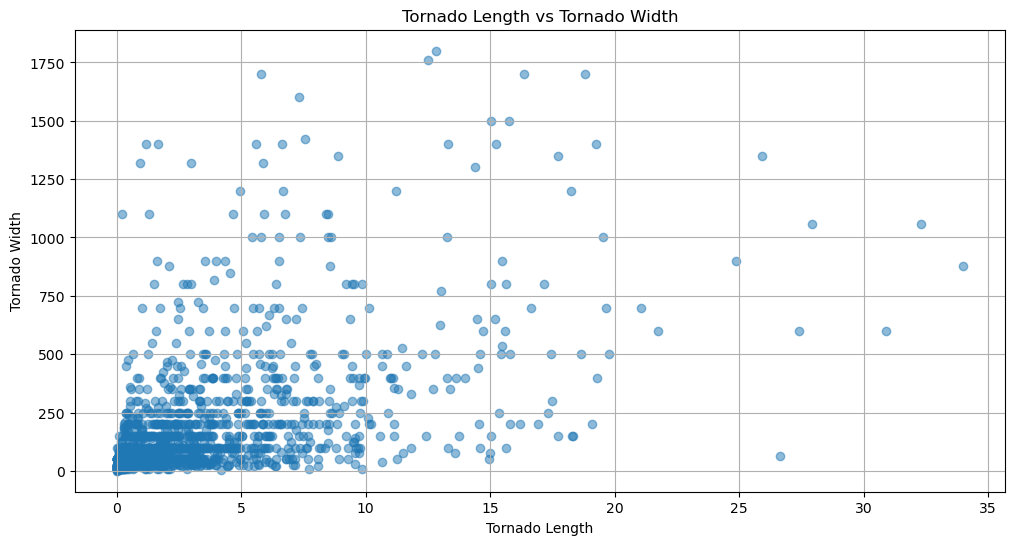

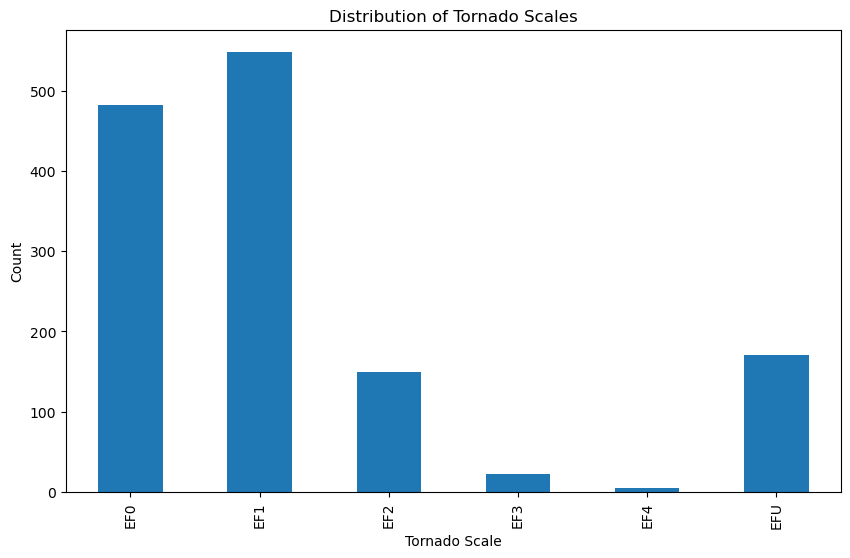

In [4]:
tornado_events = storms_2022[storms_2022['EVENT_TYPE'] == 'Tornado']

# Create a scatter plot for tornado length vs. tornado width
plt.figure(figsize=(12, 6))
plt.scatter(tornado_events['TOR_LENGTH'], tornado_events['TOR_WIDTH'], alpha=0.5)
plt.title('Tornado Length vs Tornado Width')
plt.xlabel('Tornado Length')
plt.ylabel('Tornado Width')
plt.grid(True)
plt.show()

# Create a bar plot for tornado scales
plt.figure(figsize=(10, 6))
tornado_events['TOR_F_SCALE'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Tornado Scales')
plt.xlabel('Tornado Scale')
plt.ylabel('Count')
plt.show()

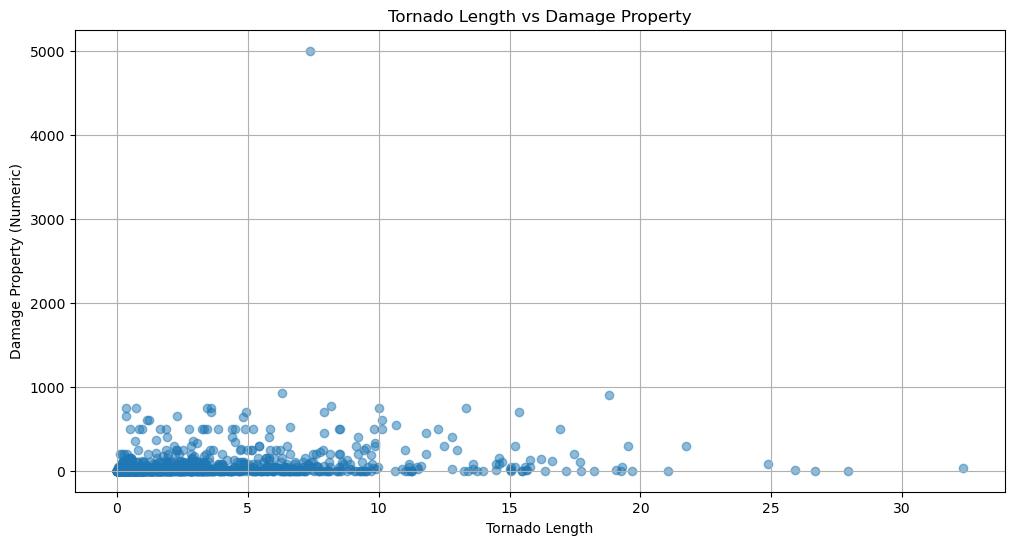

Summary Statistics:
        TOR_LENGTH  DAMAGE_PROPERTY_NUMERIC
count  1052.000000              1052.000000
mean      3.546188                65.409971
std       4.190982               202.401499
min       0.010000                 0.000000
25%       0.680000                 0.000000
50%       2.125000                 5.000000
75%       4.940000                50.000000
max      32.300000              5000.000000


In [5]:
tornado_events = storms_2022[storms_2022['EVENT_TYPE'] == 'Tornado']

# Filter out rows with missing values in TOR_LENGTH and DAMAGE_PROPERTY
tornado_events = tornado_events.dropna(subset=['TOR_LENGTH', 'DAMAGE_PROPERTY'])

# Convert DAMAGE_PROPERTY to a numeric value (remove non-numeric characters)
tornado_events['DAMAGE_PROPERTY_NUMERIC'] = tornado_events['DAMAGE_PROPERTY'].replace('[^0-9.]', '', regex=True).astype(float)

# Create a scatter plot for tornado length vs. damage
plt.figure(figsize=(12, 6))
plt.scatter(tornado_events['TOR_LENGTH'], tornado_events['DAMAGE_PROPERTY_NUMERIC'], alpha=0.5)
plt.title('Tornado Length vs Damage Property')
plt.xlabel('Tornado Length')
plt.ylabel('Damage Property (Numeric)')
plt.grid(True)
plt.show()

# Display summary statistics
print("Summary Statistics:")
print(tornado_events[['TOR_LENGTH', 'DAMAGE_PROPERTY_NUMERIC']].describe())

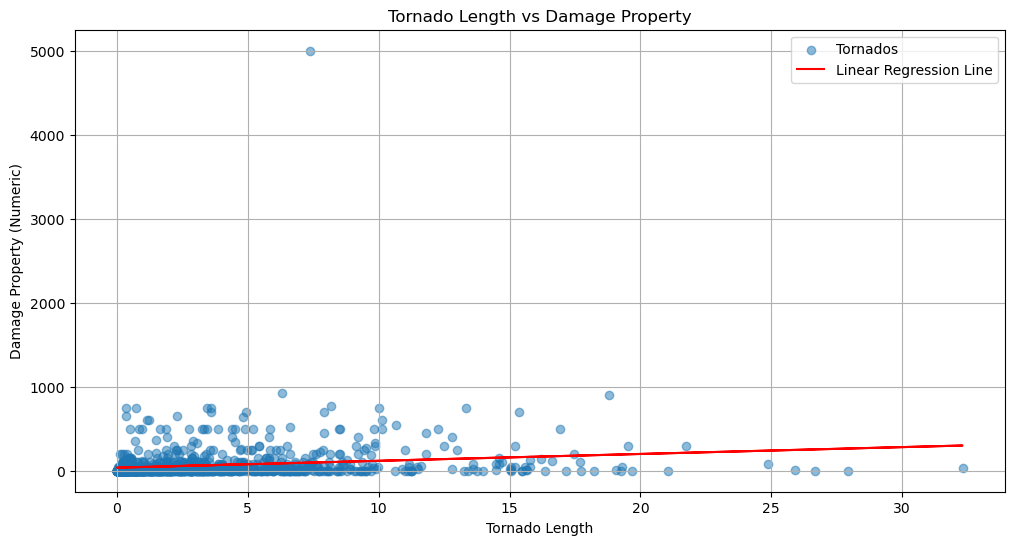

Linear Regression Coefficients:
Intercept (beta_0): 36.49677198392783
Slope (beta_1): 8.153317805737945


In [6]:
tornado_events = storms_2022[storms_2022['EVENT_TYPE'] == 'Tornado']

# Filter out rows with missing values in TOR_LENGTH and DAMAGE_PROPERTY
tornado_events = tornado_events.dropna(subset=['TOR_LENGTH', 'DAMAGE_PROPERTY'])

# Convert DAMAGE_PROPERTY to a numeric value for analysis (remove non-numeric characters)
tornado_events['DAMAGE_PROPERTY_NUMERIC'] = tornado_events['DAMAGE_PROPERTY'].replace('[^0-9.]', '', regex=True).astype(float)

# Calculate mean values
mean_length = tornado_events['TOR_LENGTH'].mean()
mean_damage = tornado_events['DAMAGE_PROPERTY_NUMERIC'].mean()

# Calculate coefficients of the linear regression equation (beta_1 and beta_0)
numerator = np.sum((tornado_events['TOR_LENGTH'] - mean_length) * (tornado_events['DAMAGE_PROPERTY_NUMERIC'] - mean_damage))
denominator = np.sum((tornado_events['TOR_LENGTH'] - mean_length) ** 2)
beta_1 = numerator / denominator
beta_0 = mean_damage - beta_1 * mean_length

# Make predictions
tornado_events['DAMAGE_PREDICTED'] = beta_0 + beta_1 * tornado_events['TOR_LENGTH']

# Visualize the linear regression line
plt.figure(figsize=(12, 6))
plt.scatter(tornado_events['TOR_LENGTH'], tornado_events['DAMAGE_PROPERTY_NUMERIC'], alpha=0.5, label='Tornados')
plt.plot(tornado_events['TOR_LENGTH'], tornado_events['DAMAGE_PREDICTED'], color='red', label='Linear Regression Line')
plt.title('Tornado Length vs Damage Property')
plt.xlabel('Tornado Length')
plt.ylabel('Damage Property (Numeric)')
plt.legend()
plt.grid(True)
plt.show()

# Display the coefficients
print("Linear Regression Coefficients:")
print("Intercept (beta_0):", beta_0)
print("Slope (beta_1):", beta_1)

In [7]:
# Calculate R-squared value
# r_squared = 1 - (rss / tss)

# # Display the R-squared value
# print("R-squared value:", r_squared)